In [1]:
import os
import pymysql
import pandas as pd

host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')

conn = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    db=database,
    charset='utf8mb4')

In [2]:
df = pd.read_sql_query(
    "SELECT DATE(created_at) AS date, COUNT(*) AS count FROM user GROUP BY date HAVING date >= '2017-04-01' ",
    conn)
df.tail(10)

,date,count
35,2017-05-22,3
36,2017-05-24,1
37,2017-05-25,1
38,2017-05-26,1
39,2017-05-27,1
40,2017-05-28,1
41,2017-05-29,4
42,2017-05-30,1
43,2017-05-31,1
44,2017-06-01,1


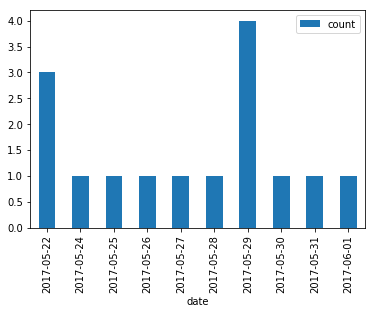

In [5]:
%matplotlib inline

df.index = df['date']
p = df.tail(10).plot.bar()

In [4]:
conn.close()